### Milestone :1 Predicting the Demand for Used Vehicles

There is an automobile company XYZ from USA which aspires to enter the US used car market by setting up their company locally to give competition to their counterparts. They want to understand the factors affecting the pricing of cars in the market, since those may be vastly different from the new car market.
       
The market for used cars has witnessed a significant surge in demand in recent times, surpassing that of new cars. Consequently, pricing strategies for used vehicles have become crucial for businesses to remain competitive in the market. The value of a used car is influenced by a multitude of factors, such as mileage, model, and year of production. It is imperative for industry players to consider these variables while determining the actual worth of a used car.
      
First step document that lists the output of your exploratory analysis, any issues, or problems you may see with data that need follow-up, and some basic descriptive analysis that you think highlights important outcomes/findings from the data. Based on your findings, the next level of analysis will be charted out. Build a multiple linear regression model for predicting the price of a used car and provide meaningful inferences.


**Dataset: Used_cars_sales.xlsx**

**Data Dictionary**

    Name 	                 Name of the Car on Sell 
    City 	                 City of the Car on Sell 
    Years             	     Year of manufacture 
    Km_driven  	             Kms Car travelled 
    Fuel_Type  	             Petrol, Diesel, CNG 
    Transmission  	         Manual, Automatic 
    Owner_Type     	         First, Second, Third 
    Mileage  	             Mileage of the Car 
    Engine 	                 Engine Displacement 
    Power             	     Power of Engine 
    Seats              	     No. of Seats in Car 
    Selling_price   	     Selling price of a Car (Target)

**Initial Guidelines:**

Ensure to follow to Use Id’s provided by UNext for naming file as conventions.


### General Instructions 

- The assessment has 16 questions, each question is a separate function
- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior 
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.

#### **Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.**

#### NOTE:
Import various libraries and modules used in data analysis, machine learning, and visualization tasks in Python such as `pandas`, `numpy`, `sklearn`, `matplotlib`, `seaborn`, `statsmodels`, `statsmodels.api`, `sklearn.model_selection`, `sklearn.linear_model`, `sklearn.metrics`, `sklearn.preprocessing`. There are 2 ways to import the libraries and modules:
* import numpy as np
* from sklearn.model_selection import train_test_split

In [89]:
# Required imports
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


### Task 1: Load the 'car_sales-dataset' available in the Dataset folder within the Project folder on the desktop. Perform preliminary EDA with key observations and insights- (weightage - 40 marks)

#### T1.1: Load the Used_cars_sales dataset using try and except blocks.          (weightage - 2 marks) (AE)        

#### NOTE:
The `read_excel` method in Pandas allows you to read Excel files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.

In [90]:
import pandas as pd
def load_the_dataset(dataset_location : str):
   try: # code starts here
    car_sales = pd.read_excel(dataset_location)
    return car_sales
   except Exception as e:
    print(f"An error occurred: {e}")
    # code ends here 
# store the result of the dataset
dataset_location = 'Used_car_sales.xlsx'
car_sales=load_the_dataset(dataset_location)
print(car_sales)


      Sales_ID                          name  year  selling_price  km_driven  \
0            1        Maruti Swift Dzire VDI  2014         450000     145500   
1            2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2            3      Honda City 2017-2020 EXi  2006         158000     140000   
3            4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4            5        Maruti Swift VXI BSIII  2007         130000     120000   
...        ...                           ...   ...            ...        ...   
7901      8124             Hyundai i20 Magna  2013         320000     110000   
7902      8125         Hyundai Verna CRDi SX  2007         135000     119000   
7903      8126        Maruti Swift Dzire ZDi  2009         382000     120000   
7904      8127               Tata Indigo CR4  2013         290000      25000   
7905      8128               Tata Indigo CR4  2013         290000      25000   

        fuel seller_type transmission  

#### T1.2: Which brand is selling the most in terms of the number of units sold    (weightage - 2 marks)  (AE)  

**Hint: output should be the name of the brand only.**

#### NOTE:
To count each unique value in the 'name' column of the DataFrame car_sales we can use the value_counts() method. It returns a Series where the index contains unique car names, and the values represent the frequency of each name in the DataFrame.
To find the name of the car brand with the maximum count we can use the idxmax() method on the series. It returns the name of the most selling brand in the DataFrame.

In [91]:
def get_name_value_counts(car_sales):  
    #code starts here
    most_selling_brand = car_sales['name'].str.split().str[0].value_counts().idxmax()


    #code ends here
    return most_selling_brand
get_name_value_counts(car_sales)

'Maruti'

#### T1.3: Name the top 5 cities with the highest number of cars sold.. (weightage - 2 marks)        (AE)

**Hint: Output should be city name only in the format of list**

#### NOTE:
To calculate the count of each unique value in the 'City' column of the DataFrame data use the value_counts() method. It will returns a Series where the index contains unique city names, and the values represent the frequency of each city in the DataFrame.
Now to select the top 5 cities with the highest sales count use the head() method on the Series. By default, head() returns the first 5 rows of the Series, which in this case, correspond to the cities with the highest sales.

In [92]:

def get_city_value_counts(data):
#     #code starts here
      top_cities = car_sales['City'].value_counts().head()
      return top_cities
#     #code ends here
#     return city_with_max_sales.head()
# Remove 'name', 'count', and 'dtype' information   
city_name=get_city_value_counts(car_sales)
list(city_name.index)

['Delhi', 'Noida', 'Mumbai', 'Coimbatore', 'Vellore']

#### T1.4: Check missing values in the data in terms of percentage using error handling technique and do missing value treatment.  (weightage - 4 marks)       (AE) 

#### NOTE:
Find the percentage of missing values in the data by dividing the total number of missing values by the total number of rows and multiplying by 100, you will get the percentage of missing values for each column. 

Use `isnull().sum()` to calculate the total number of missing values in each column and `shape[0]` to get the total number of rows in the DataFrame.

In [93]:
def missing_value_check(data):
    #code starts here
    try:
      total_rows = car_sales.shape[0]
      missing_percentage = car_sales.isnull().sum()/total_rows*100
        
        
    except Exception as e:
        return 'An error occurred'

    #code ends here
    return missing_percentage
missing_value_check(car_sales)

Sales_ID         0.000000
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.240324
seller_type      0.202378
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           0.000000
max_power        0.000000
seats            0.000000
City             0.000000
Postal_code      0.000000
Sales_status     0.000000
dtype: float64

#### NOTE:
For treating the missing value first define the list of columns containing the names of the columns with missing values which will be treated. Iterate over each column in the list:

If the column is numerical, fill the missing values using the mean or median of that column (based on suitability).

If the column is categorical, fill the missing values using the mode (most frequent value) of that column.

In [94]:
# # Missing value treatment
def missing_value_treatment(car_sales):
    missing_cols = [col for col in car_sales.columns if car_sales[col].isnull().sum()>0]

    for col in missing_cols:
        if pd.api.types.is_numeric_dtype(car_sales[col]):
            skewness = car_sales[col].skew()
            if abs(skewness) > 1:
                fill_value = car_sales[col].median()
            else:
               fill_value = car_sales[col].mean()
            car_sales[col]= car_sales[col].fillna(fill_value)
        else:
            fill_value = car_sales[col].mode()[0]
            car_sales[col]= car_sales[col].fillna(fill_value)

    return car_sales    



    # code ends here
        
#     return car_sales
car_sales = missing_value_treatment(car_sales)
print(car_sales.isnull().sum())

Sales_ID         0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
City             0
Postal_code      0
Sales_status     0
dtype: int64


#### T1.5: Detect Outliers in the data and do outlier treatment. Plot a boxplot to visualize outliers in the data. (weightage – 6 marks)        (AE)     
* The extreme values in selling_price due to genuine market conditions, such as luxury properties.Keep the values as it is.

#### NOTE:
The `sns.boxplot()` function in Seaborn is used to create a box plot visualization, which is a convenient way to visually summarize the distribution of numerical data and identify outliers. Using this detect the outliers in the `car_sales` dataframe. 

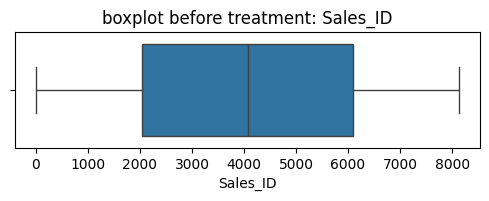

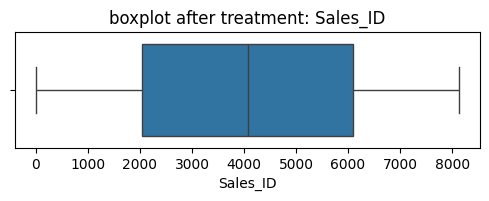

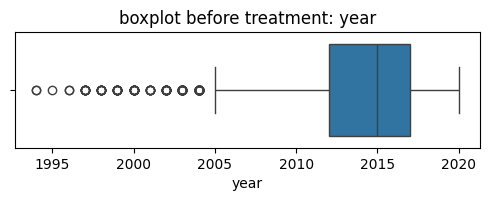

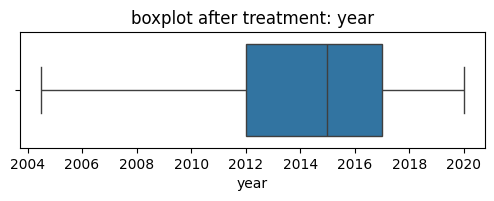

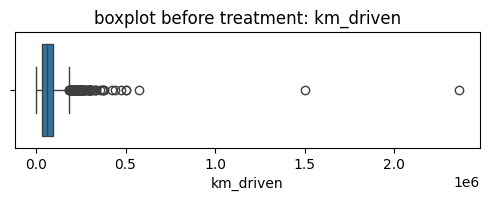

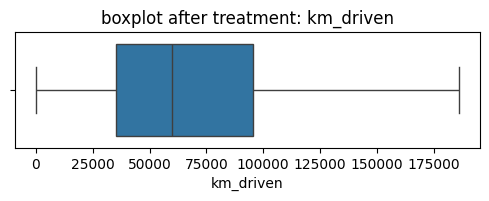

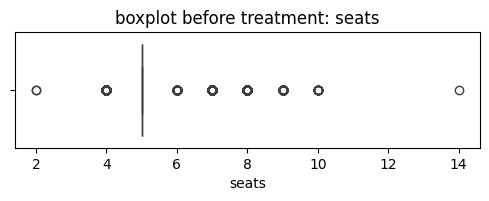

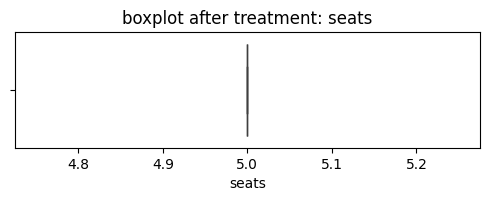

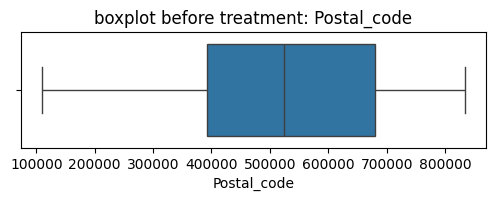

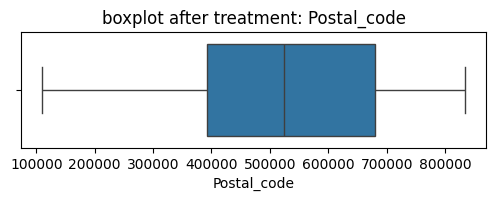

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,1,Maruti Swift Dzire VDI,2014.0,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Mumbai,400001,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014.0,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Ranchi,834008,Y
2,3,Honda City 2017-2020 EXi,2006.0,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Noida,201301,Y
3,4,Hyundai i20 Sportz Diesel,2010.0,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Dehradun,248141,Y
4,5,Maruti Swift VXI BSIII,2007.0,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Chennai,600020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,2013.0,320000,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,Indore,453551,N
7902,8125,Hyundai Verna CRDi SX,2007.0,135000,119000.0,Diesel,Individual,Manual,Third Owner,16.8 kmpl,1493 CC,110 bhp,5.0,Dehradun,248141,N
7903,8126,Maruti Swift Dzire ZDi,2009.0,382000,120000.0,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,Kolkata,700027,N
7904,8127,Tata Indigo CR4,2013.0,290000,25000.0,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,Vellore,632001,N


In [95]:
# plot a boxplot to visualize outliers in the data
#car_sales = car_sales.drop('Sales_ID', axis=1)
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot1(car_sales):
    # code starts here
    exclude_cols = ['selling_price']
        
    numerical_cols = car_sales.select_dtypes(include ='number').columns
    outlier_cols = [col for col in numerical_cols if col not in exclude_cols]

    for col in outlier_cols:
        Q1 = car_sales[col].quantile(0.25)
        Q3 = car_sales[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        plt.figure(figsize = (6,1.5))
        sns.boxplot(x = car_sales[col])
        plt.title(f"boxplot before treatment: {col}")
        plt.show()
        car_sales[col] = car_sales[col].apply(lambda x:lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        plt.figure(figsize = (6,1.5))
        sns.boxplot(x = car_sales[col])
        plt.title(f"boxplot after treatment: {col}")
        plt.show()

    # code ends here
    return car_sales
box_plot1(car_sales)

#### Define a function `treat_outliers_iqr` to treat outliers using IQR method. Use `median` as treatment method.

#### NOTE:
The outliers in the dataset can be treated using the Interquartile Range (IQR) method. It replaces the outliers with either the median or the mean, based on the specified treatment method. Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) of the data along with the lower and upper bounds for outliers. Then replace the outliers with the median of the data.

In [96]:
# Define a function to detect and treat outliers using IQR method
def treat_outliers_iqr(car_sales,treatment='median'):

    data = data.copy()  # Avoid modifying the original DataFrame slice
    #code starts here
    for col in numeric_cols:
        Q1 = car_sales[col].quantile(0.25)
        Q3 = car_sales[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if treatment == 'mean':
            replacement_value = car_sales[col].mean()
        else:
             replacement_value = car_sales[col].median()

        car_sales[col] = car_sales[col].apply(lambda x:replacement_value if x < lower_bound or x > upper_bound else x)
    
    return data
# Detect outliers and treat them with median value
numeric_columns=['km_driven']
# Display the treated DataFrame

#code ends here
# Display the treated DataFrame
print(car_sales.head())

   Sales_ID                          name    year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014.0         450000   145500.0   
1         2  Skoda Rapid 1.5 TDI Ambition  2014.0         370000   120000.0   
2         3      Honda City 2017-2020 EXi  2006.0         158000   140000.0   
3         4     Hyundai i20 Sportz Diesel  2010.0         225000   127000.0   
4         5        Maruti Swift VXI BSIII  2007.0         130000   120000.0   

     fuel seller_type transmission         owner     mileage   engine  \
0  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1  Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC   
2  Petrol  Individual       Manual   Third Owner   17.7 kmpl  1497 CC   
3  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
4  Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC   

    max_power  seats      City  Postal_code Sales_status  
0      74 bhp    5.0    Mum

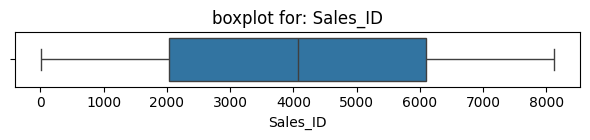

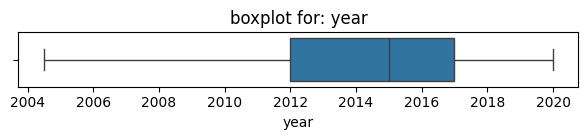

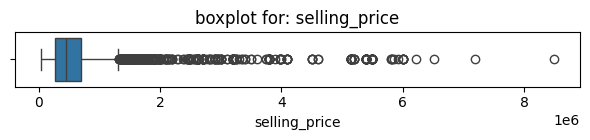

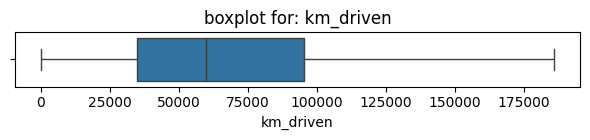

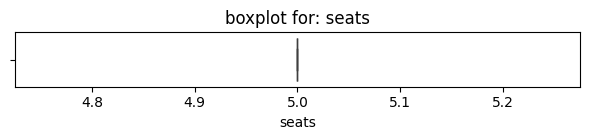

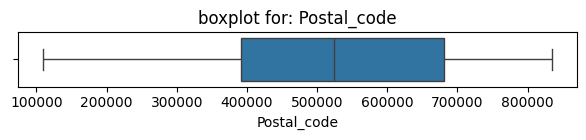

In [97]:
# plot a boxplot to visualize outliers in the data
#car_sales = car_sales.drop('Sales_ID', axis=1)
def box_plot2(data):
    # code starts here
    numerical_cols = car_sales.select_dtypes(include ='number').columns

    for col in numerical_cols:
        plt.figure(figsize = (6,1.5))
        sns.boxplot(x = car_sales[col])
        plt.title(f"boxplot for: {col}")
        plt.tight_layout()
        plt.show()
    

    # code ends here
    return 
box_plot2(car_sales)

#### T1.6: Which variables are significant in predicting the price of a used car? To answer this question, it is important to understand the correlation between the different variables. i.e how much the other features affect the selling price of a used car. (Bivariate analysis) (weightage - 3 marks)               (AE)

#### Cleaning the data

#### NOTE:
To understand the correlation between different variables , we have to convert the non numeric columns into numeric columns. Clean the data type of the 'max_power', 'engine', and 'mileage' columns in a DataFrame by converting them into numeric types by removing the units in order to perform correlation on them.

Removes the following non-numeric suffix using string manipulation functions:
* 'bhp' for max_power, 
* 'CC' for engine, 
* 'kmpl' or 'km/kg' for mileage

Converts the data type of each of the above column to float 

In [98]:
# define a function to convert data type of Max power, Engine and Mileage into numeric
def clean_car_sales_data(df):
    #code starts here
    df = car_sales.copy()
    df['max_power'] = pd.to_numeric(df['max_power'].str.replace('bhp','',regex = False).str.strip(),errors = 'coerce') if 'max_power' in df else df
    df['engine'] = pd.to_numeric(df['engine'].str.replace('cc','',regex = False).str.strip(),errors = 'coerce') if 'engine' in df else df
    df['mileage'] = pd.to_numeric(df['mileage'].str.replace('kmpl','',regex = False).str.strip(),errors = 'coerce') if 'mileage' in df else df
    

    
    #code ends here
    return df
car_sales = clean_car_sales_data(car_sales)
car_sales

,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,1,Maruti Swift Dzire VDI,2014.0,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,NaN,74.00,5.0,Mumbai,400001,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014.0,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,NaN,103.52,5.0,Ranchi,834008,Y
2,3,Honda City 2017-2020 EXi,2006.0,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,NaN,78.00,5.0,Noida,201301,Y
3,4,Hyundai i20 Sportz Diesel,2010.0,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,NaN,90.00,5.0,Dehradun,248141,Y
4,5,Maruti Swift VXI BSIII,2007.0,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,NaN,88.20,5.0,Chennai,600020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,2013.0,320000,110000.0,Petrol,Individual,Manual,First Owner,18.50,NaN,82.85,5.0,Indore,453551,N
7902,8125,Hyundai Verna CRDi SX,2007.0,135000,119000.0,Diesel,Individual,Manual,Third Owner,16.80,NaN,110.00,5.0,Dehradun,248141,N
7903,8126,Maruti Swift Dzire ZDi,2009.0,382000,120000.0,Diesel,Individual,Manual,First Owner,19.30,NaN,73.90,5.0,Kolkata,700027,N
7904,8127,Tata Indigo CR4,2013.0,290000,25000.0,Diesel,Individual,Manual,First Owner,23.57,NaN,70.00,5.0,Vellore,632001,N


#### Correlation between numerical variables and target variable

#### NOTE:
Using Python function `corr` compute the correlation matrix of a DataFrame df containing numeric columns.
Ensure that only numeric columns are included in the correlation computation.

In [99]:
def corr(df):
    correlation = None
    #code starts here
    correlation = car_sales.select_dtypes(include ='number').corr()
    
    #code ends here
    return correlation
corr_data = corr(car_sales)
corr_data

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,Postal_code
Sales_ID,1.000000,0.001586,-0.011767,0.013383,0.031914,NaN,-0.003717,NaN,-0.010781
year,0.001586,1.000000,0.423070,-0.543397,0.331599,NaN,0.220927,NaN,0.005112
selling_price,-0.011767,0.423070,1.000000,-0.284014,-0.127303,NaN,0.749512,NaN,0.008702
km_driven,0.013383,-0.543397,-0.284014,1.000000,-0.191389,NaN,-0.057303,NaN,-0.006740
mileage,0.031914,0.331599,-0.127303,-0.191389,1.000000,NaN,-0.373360,NaN,-0.012951
engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_power,-0.003717,0.220927,0.749512,-0.057303,-0.373360,NaN,1.000000,NaN,0.007089
seats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal_code,-0.010781,0.005112,0.008702,-0.006740,-0.012951,NaN,0.007089,NaN,1.000000


#### T1.7: Come up with Insights and validate the hypothesis:                         (weightage: 15 marks)  (AE)

(i) Is there a statistically significant difference in the average mileage of cars across different fuel types and transmission types?

(ii) Is there a statistically significant difference in the selling prices of cars between individual and dealer sellers?

(iii)Is there a relationship between the type of fuel and transmission in cars?

#### (i) Is there a statistically significant difference in the average mileage of cars across different fuel types and transmission types?

- If yes,print :"There is a significant difference in the average mileage of cars across different fuel types and transmission types"
- If no, print: There is no significant difference in the average mileage of cars across different fuel types and transmission types"

#### NOTE:
Conduct an Analysis of Variance (ANOVA) test to determine if there is a significant difference in the average mileage of cars across different fuel types and transmission types.
* Groups the data to create separate groups for each category.
* Then perform the ANOVA test using the stats.f_oneway() function from the scipy.stats module.
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison, determine whether there is a significant difference in the average mileage of cars across different fuel types and transmission types.

In [100]:
import scipy.stats as stat

def perform_anova(car_data):
    result1 = None
    data = car_data[['mileage','fuel']].dropna()
    data['mileage'] = pd.to_numeric(data['mileage'],errors = 'coerce')
    data = data.dropna()
    
    fuel_groups = [group ['mileage'].values for name,group in data.groupby('fuel')]
    
    f_stat,p_val = stat.f_oneway(*fuel_groups)
    
    if p_val < 0.05:
        result1 = "There is a significant difference in the average mileage of cars across different fuel types and transmission types"
    else:
        result1 = "There is no significant difference in the average mileage of cars across different fuel types and transmission types"
    return result1
# Call the function
perform_anova(car_sales)

'There is a significant difference in the average mileage of cars across different fuel types and transmission types'

#### (ii) Is there a statistically significant difference in the selling prices of cars between individual and dealer sellers?

- If yes,print : "There is a statistically significant difference in the selling prices of cars between individual and dealer sellers"
- If no, print: "There is no statistically significant difference in the selling prices of cars between individual and dealer sellers"

#### Note:
Conducts an independent two-sample t-test to determine if there is a statistically significant difference in the selling prices of cars between individual and dealer sellers.
* Filter the data based on the 'seller_type' column to separate the selling prices of cars sold by individual sellers and dealer sellers.
* Perform the independent two-sample t-test using the ttest_ind() function from the scipy.stats module. 
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison,determines whether there is a statistically significant difference in the selling prices of cars between individual and dealer sellers.

In [101]:
car_sales['seller_type'].dropna().unique()

array(['Individual', 'Dealer'], dtype=object)

In [102]:
from scipy.stats import ttest_ind
def seller_type_influence_test(car_sales):
    result2 = None
    # Code starts here
    # Filter data based on seller type
    data = car_sales[car_sales['seller_type'].isin(['Individual','Dealer'])][['selling_price','seller_type']].dropna()

    individual_prices = data[data['seller_type'] == 'Individual']['selling_price']
    dealer_prices = data[data['seller_type'] == 'Dealer']['selling_price']
    t_stat,p_val = ttest_ind(individual_prices,dealer_prices,equal_var=False)
    alpha = 0.05
    if p_val < alpha:
      result_2 = "There is a statistically significant difference in the selling prices of cars between individual and dealer sellers"
      print(result_2)
    else:
      result_2 = "There is no statistically significant difference in the selling prices of cars between individual and dealer sellers"
    
    # Interpret the results
    
    
    # Code ends here    
    return result2
seller_type_influence_test(car_sales)

There is a statistically significant difference in the selling prices of cars between individual and dealer sellers


#### (iii) Is there a relationship between the type of fuel and transmission in cars?

- If yes,print : "There is a statistically significant relationship between the type of fuel and transmission in cars"
- If no, print: "There is no statistically significant relationship between the type of fuel and transmission in cars"

#### NOTE:
Conduct a chi-square test of independence to determine if there is a statistically significant relationship between the type of fuel and transmission in cars.
* Creates a contingency table of observed frequencies using the pd.crosstab() function. 
* Perform the chi-square test of independence using the stats.chi2_contingency() function from the scipy.stats module. 
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison, determine whether there is a statistically significant relationship between the type of fuel and transmission in cars.

In [103]:
from scipy.stats import chi2_contingency
def chi_square_test(car_data):
    result3 = None
    #code starts here
    # Create a contingency table of observed frequencies
    contingency_table = pd.crosstab(car_data['fuel'],car_data['transmission'])
    chi2,p_val,dof,expected = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_val < alpha:
      result3 =  "There is a statistically significant relationship between the type of fuel and transmission in cars"
    else:
      result3 = "There is no statistically significant relationship between the type of fuel and transmission in cars"


    return result3


# Call the function
chi_square_test(car_sales)
# car_sales.columns

'There is a statistically significant relationship between the type of fuel and transmission in cars'

#### T1.8: Data Transformation:  remove the given variables for model building process ("name","Postal_code","Sales_ID"). (weightage - 2 marks)        (AE)      

#### NOTE:
Drop the varaiables "name","Postal_code","Sales_ID" from the dataframe using the drop() function. 

In [104]:
# drop the given variables
from sklearn.preprocessing import StandardScaler
def drop_var1(car_sales):
    # Code starts here
    cols_to_drop = ["name","Postal_code","Sales_ID"]
    cars_sales = car_sales.drop(columns=[col for col in cols_to_drop if col in car_sales.columns],errors = 'ignore')

    numeric_cols = cars_sales.select_dtypes(include = ['int64','float64']).columns
    scaler = StandardScaler()
    car_sales[numeric_cols] = scaler.fit_transform(car_sales[numeric_cols])
    
    # Code ends here
    return car_sales
car_sales = drop_var1(car_sales)
car_sales

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,1,Maruti Swift Dzire VDI,-0.011720,-0.245987,1.809263,Diesel,Individual,Manual,First Owner,1.002025,NaN,-0.492024,0.0,Mumbai,400001,Y
1,2,Skoda Rapid 1.5 TDI Ambition,-0.011720,-0.344567,1.217674,Diesel,Individual,Manual,Second Owner,0.437240,NaN,0.333827,0.0,Ranchi,834008,Y
2,3,Honda City 2017-2020 EXi,-2.188804,-0.605804,1.681665,Petrol,Individual,Manual,Third Owner,-0.422433,NaN,-0.380120,0.0,Noida,201301,Y
3,4,Hyundai i20 Sportz Diesel,-1.100262,-0.523243,1.380071,Diesel,Individual,Manual,First Owner,0.902063,NaN,-0.044408,0.0,Dehradun,248141,Y
4,5,Maruti Swift VXI BSIII,-1.916669,-0.640307,1.217674,Petrol,Individual,Manual,First Owner,-0.822281,NaN,-0.094765,0.0,Chennai,600020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,-0.283856,-0.406179,0.985678,Petrol,Individual,Manual,First Owner,-0.222509,NaN,-0.244437,0.0,Indore,453551,N
7902,8125,Hyundai Verna CRDi SX,-1.916669,-0.634146,1.194474,Diesel,Individual,Manual,Third Owner,-0.647348,NaN,0.515111,0.0,Dehradun,248141,N
7903,8126,Maruti Swift Dzire ZDi,-1.372398,-0.329780,1.217674,Diesel,Individual,Manual,First Owner,-0.022585,NaN,-0.494822,0.0,Kolkata,700027,N
7904,8127,Tata Indigo CR4,-0.283856,-0.443147,-0.986284,Diesel,Individual,Manual,First Owner,1.044509,NaN,-0.603928,0.0,Vellore,632001,N


#### T1.9: Handling categorical features: Apply encoding technique to convert categorical variable into numerical. Use try and except blocks.  (weightage - 4 marks)    (AE)

#### NOTE:
scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?
Transform city variable to 4 categories such as `North_city, South_city, East_city and West_city` according to the below given list.

In [105]:
# Define regions
def city_region(sales_data):
    north_cities = ['Dehradun','Mumbai','Jaipur','Indore','Pune','Aurangabad', 'Delhi','Ludhiana', 'kanpur', 'Gangtok', 'Noida']
    south_cities = ['Chennai','Mysore', 'Bangalore', 'Nellore', 'Coimbatore','Mangalore','Hyderabad','Vellore','Thrissur']
    east_cities = ['Ranchi', 'Kolkata', 'Jamshedpur', 'Patna', 'Bhubaneshwar']
    west_cities = ['Ahmedabad','Kochi','Vadodara', 'Surat']

    # Transform the City variable to 4 categories
    #code starts here
    try:
        cat_cols = sales_data.select_dtypes(include = ['object','category']).columns.tolist()
        car_sales_encoded = pd.get_dummies(sales_data,columns = catcols,drop_first  = True)
        return car_sales_encoded
    except Exception as e:
        print("Error while encoding")
        return sales_data

    # code ends here
    
    # Print the updated DataFrame
         
#apply city_region() in the original data
car_sales=city_region(car_sales)
car_sales

Error while encoding


,Sales_ID,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,1,Maruti Swift Dzire VDI,-0.011720,-0.245987,1.809263,Diesel,Individual,Manual,First Owner,1.002025,NaN,-0.492024,0.0,Mumbai,400001,Y
1,2,Skoda Rapid 1.5 TDI Ambition,-0.011720,-0.344567,1.217674,Diesel,Individual,Manual,Second Owner,0.437240,NaN,0.333827,0.0,Ranchi,834008,Y
2,3,Honda City 2017-2020 EXi,-2.188804,-0.605804,1.681665,Petrol,Individual,Manual,Third Owner,-0.422433,NaN,-0.380120,0.0,Noida,201301,Y
3,4,Hyundai i20 Sportz Diesel,-1.100262,-0.523243,1.380071,Diesel,Individual,Manual,First Owner,0.902063,NaN,-0.044408,0.0,Dehradun,248141,Y
4,5,Maruti Swift VXI BSIII,-1.916669,-0.640307,1.217674,Petrol,Individual,Manual,First Owner,-0.822281,NaN,-0.094765,0.0,Chennai,600020,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai i20 Magna,-0.283856,-0.406179,0.985678,Petrol,Individual,Manual,First Owner,-0.222509,NaN,-0.244437,0.0,Indore,453551,N
7902,8125,Hyundai Verna CRDi SX,-1.916669,-0.634146,1.194474,Diesel,Individual,Manual,Third Owner,-0.647348,NaN,0.515111,0.0,Dehradun,248141,N
7903,8126,Maruti Swift Dzire ZDi,-1.372398,-0.329780,1.217674,Diesel,Individual,Manual,First Owner,-0.022585,NaN,-0.494822,0.0,Kolkata,700027,N
7904,8127,Tata Indigo CR4,-0.283856,-0.443147,-0.986284,Diesel,Individual,Manual,First Owner,1.044509,NaN,-0.603928,0.0,Vellore,632001,N


- drop the City variable

In [106]:
def drop_var2(data):
    # code starts here
     data = data.drop(columns = ['City'])
     cat_cols = data.select_dtypes(include = ['object','category']).columns.tolist()
     car_sales_encoded = pd.get_dummies(data,columns = cat_cols,drop_first  = True)
     return car_sales_encoded
car_sales = drop_var2(car_sales)
car_sales

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,Postal_code,name_Ambassador Classic 2000 DSZ AC PS,...,name_Volvo XC40 D4 R-Design,name_Volvo XC60 Inscription D5 BSIV,name_Volvo XC90 T8 Excellence BSIV,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third Owner,Sales_status_Y
0,1,-0.011720,-0.245987,1.809263,1.002025,NaN,-0.492024,0.0,400001,False,...,False,False,False,True,False,True,True,False,False,True
1,2,-0.011720,-0.344567,1.217674,0.437240,NaN,0.333827,0.0,834008,False,...,False,False,False,True,False,True,True,True,False,True
2,3,-2.188804,-0.605804,1.681665,-0.422433,NaN,-0.380120,0.0,201301,False,...,False,False,False,False,True,True,True,False,True,True
3,4,-1.100262,-0.523243,1.380071,0.902063,NaN,-0.044408,0.0,248141,False,...,False,False,False,True,False,True,True,False,False,True
4,5,-1.916669,-0.640307,1.217674,-0.822281,NaN,-0.094765,0.0,600020,False,...,False,False,False,False,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,-0.283856,-0.406179,0.985678,-0.222509,NaN,-0.244437,0.0,453551,False,...,False,False,False,False,True,True,True,False,False,False
7902,8125,-1.916669,-0.634146,1.194474,-0.647348,NaN,0.515111,0.0,248141,False,...,False,False,False,True,False,True,True,False,True,False
7903,8126,-1.372398,-0.329780,1.217674,-0.022585,NaN,-0.494822,0.0,700027,False,...,False,False,False,True,False,True,True,False,False,False
7904,8127,-0.283856,-0.443147,-0.986284,1.044509,NaN,-0.603928,0.0,632001,False,...,False,False,False,True,False,True,True,False,False,False


#### Encoding technique: convert other categorical variable into factor variable

In [88]:
from sklearn.preprocessing import LabelEncoder
def encode_categorical_columns(df):    
    try:
        # Initialize LabelEncoder
        # code starts here

        # Label encode selected columns
        label_encode_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'Sales_status']

        for col in label_encode_columns:
            df[col] = df[col].astype('category')

        # One-hot encode 'City_region'
        
        #code ends here
    except Exception as e:
        return "An error occurred during encoding:"

    return df
# apply it in the original data
car_sales =encode_categorical_columns(car_sales)
# car_sales

#### NOTE:
Save the DataFrame car_sales to an Excel file named __"cleaned_car_sales.xlsx"__ in the `Project1` folder without including the index column. 

In [107]:
def save_file(data):
    try:
        # code starts here
        data.to_excel("cleaned_car_sales.xlsx",index = False )
        # code ends here
        print("Write operation successfully completed.")
    except Exception as e:
        print("Write operation not completed.")
        print(f"Error: {e}")
save_file(car_sales)

Write operation successfully completed.


### Task 2: Build Multiple Linear regression model for predicting the price of a used car. (weightage - 30 marks)               

#### T2.1: Load the cleaned dataset and divide it into predictor and target values (X & y) (weightage – 2 marks) (AE)

In [ ]:
# load the cleaned data
def load_the_cleaned_dataset(dataset_location):
        cleaned_car_sales = None
        # Code starts here
        
        # Code ends here
        return cleaned_car_sales
dataset_location = 'cleaned_car_sales.xlsx'
cleaned_car_sales=load_the_cleaned_dataset(dataset_location)    
print("cleaned_car_sales.xlsx load complete")

- Separate independent features and target variable

In [ ]:
# Separate independent features and target variable
def separate_data_and_target(df):
    X, y = np.ndarray([]),np.ndarray([])
    #code starts here
    

   
    #code ends here
    return X,y
# dependent : X, independent : y
X, y = separate_data_and_target(cleaned_car_sales)
print(X)
print(y)

#### T2.2: Split the dataset into train and test in the ratio of 80:20 and apply the scaling technique -RobustScaler. (weightage – 4 marks) (AE)

#### NOTE:

Split the dataset into training and testing. Separate the dependent (data) and independent (target) columns/fields of the dataset and apply the scaling technique -RobustScaler.The requirement is to build a model that performs regression task.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

def split_into_train_and_test_normalize_features(X,y):
    X_train, X_test,y_train,y_test = np.ndarray([]),np.ndarray([]),np.ndarray([]),np.ndarray([])

    #code starts here
    # Splitting dataset to train and test sets 80% train and 20% test  (random_state=0)
     

        
    #Normalizes selected features in a dataset 
    # Instantiate the RobustScaler
    

    # Fit the scaler to the training data and transform it
       

    # Transform the testing data using the same scaler
    
   # code ends here
    return X_train, X_test,y_train,y_test
X_train, X_test,y_train,y_test=split_into_train_and_test_normalize_features(X,y)
print("--------X_train-----------")
print(X_train)
print("--------X_test-----------")
print(X_test)
print("--------y_train-----------")
print(y_train)
print("--------y_test-----------")
print(y_test)

##### T2.3 Check the multicollinearity using VIF for all the variables in the model (weightage-4 marks)  (AE)

#### NOTE:
* Splits the data into training and testing sets using the train_test_split function from scikit-learn. 
* Define the dependent variable (y1) and independent variables (X1) using the `dmatrices` function from the `patsy` module. 
* For each independent variable in X1, it calculates the VIF using the variance_inflation_factor function from the statsmodels.stats.outliers_influence module. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.
* Store the calculated VIF values along with the corresponding feature names in a DataFrame `vif` to display the VIF values for each feature.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

def multicollinearity(data): 

    # code starts here
    # random_state=1234
    
    y1, X1 = dmatrices('selling_price~year+km_driven+max_power+engine+seats+fuel+seller_type+Sales_status+mileage+transmission+owner',train, return_type='dataframe')

    # For each X, calculate VIF and save in dataframe

    # code ends here
    print(vif.round(1))
    return
multicollinearity(cleaned_car_sales)

#### T2.4: Build a multiple linear regression model on training data using OLS method and sklearn library . (weightage - 20 marks) (AE)

#### NOTE:
* Split the dataset into train and test in the ratio of 80:20.
* Set the random_state to 1234
* Build the OLS model using statsmodels formula API
* The function `fit_the_model_ols` should return the OLS Model and the test data.

**Build a model using OLS**

In [ ]:
import statsmodels.formula.api as smf
def fit_the_model_ols(data):    
    ols_model = None
    train, test = np.ndarray([]),np.ndarray([])
    # Code starts here
    #random state=1234

    
    # Building the OLS model using statsmodels formula API

    
     # code ends here   
    # Return the model and the test data    
    return ols_model,test
# Fit the model
ols_model, test_data = fit_the_model_ols(cleaned_car_sales)
print("-----------test_data---------")
print(test_data)
# Get the summary of the fitted model
summary = ols_model.summary()
# Print the summary
print("------Model Summary ---------")
print(summary)

**Build a linear model using sklearn library** 

#### NOTE:
* Initializes a linear regression model object.
* Fit the model to the training data (X_train and y_train) using the fit() method of the linear regression object. 

In [ ]:
def fit_the_model_on_the_training_data(data,X_train:np.ndarray,y_train:np.ndarray):
    regression = None
    # Code starts here

    
    # Code ends here 
    return regression
# train the training data 
sklearn_model=fit_the_model_on_the_training_data(cleaned_car_sales,X_train,y_train)
sklearn_model

### Task 3: Evaluate the performance of the model using the right evaluation metrics. (weightage - 25 marks)

#### T3.1: Evaluate the linear regression model with evaluation metrics R2 and RMSE using OLS and sklearn library (weightage - 10 marks) (AE)

**Evaluate the OLS model**

#### NOTE
* Make the predictions on the test set using the provided OLS linear regression model 
* Calculate the RMSE by comparing the predicted selling prices with the actual selling prices in the test set, using the mean_squared_error function from scikit-learn.
* Calculate the R-squared (R²) value using the rsquared attribute of the linear regression model.
* Return both `RMSE` and `R²` value.

In [ ]:
from sklearn.metrics import mean_squared_error
def ols_calculate_rmse_r2(model, test_data):
    rmse,r_squared = 0.0,0.0

    # code starts here
    # Making predictions on the test set
    

    # Calculating RMSE
   
    # code ends here
    return rmse,r_squared
ols_rmse, ols_r_squared = ols_calculate_rmse_r2(ols_model, test_data)
# OLS Model RMSE value
print("-----------ols_rmse-----------")
print (ols_rmse)
# OLS R2 value
print("--------------ols_r_squared----------")
print (ols_r_squared)

**Evaluate the Sklearn model**

#### NOTE:
* Make the predictions using a trained scikit-learn model (model) on a test dataset (X_test)
* Using the trained model predict the target variable for the provided test dataset (X_test) using the predict() method of the model.
* Return the predicted target variable values

In [ ]:
def test_the_sklearn_model(model, X_test: np.ndarray) -> np.ndarray:
    y_prediction = np.ndarray([])
    # code starts here
   
    # code ends here
    return y_prediction
y_pred=test_the_sklearn_model(sklearn_model,X_test)
y_pred

**Evaluate the model with evaluation metric R2 and RMSE**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
def calculate_r_squared_sklearn(y_true, y_pred):
    """
    Calculate the R-squared (coefficient of determination) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        R-squared value.
    """
    r_squared = None
    # Code starts here

    
    # Code ends here
    return r_squared
# Calculate R-squared   [ RMSE on training]
r_squared = calculate_r_squared_sklearn(y_test, y_pred)
print(r_squared)

In [ ]:
def calculate_rmse_sklearn(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        RMSE value.
    """
    rmse = None
    # Code starts here

    
    # Code ends here     
    return rmse
# Calculate RMSE
rmse_test = calculate_rmse_sklearn(y_test, y_pred)
print(rmse_test)

#### T3.2:Remove the insignificant variables which identified by OLS and multicollinearity -VIF technique. Then apply log transformation on target variable and build the model using sklearn library and evaluate it with R2 and RMSE(weightage - 15 marks) (AE)

**Remove insignificant variable**
#### NOTE:
* Because of multicollinearity issue drop the variable engine (VIF > 5)
* Because of insignificance drop the variables - City_region, owner, Sales_status

### Test for heteroscedasticity

In [ ]:
residuals = y_test - y_pred

# Create the residuals vs. fitted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()

### Shapiro-Wilk Normality Test

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0).")
else:
    print("Residuals do not appear to be normally distributed (reject H0).")


In [ ]:
def drop_variables(data):
    # code starts here

    # code ends here
    return data
cleaned_car_sales=drop_variables(cleaned_car_sales)
cleaned_car_sales

**Apply Log transformation on target variable**

#### NOTE:
* Transform the target variable 'selling_price' into its natural logarithm ('ln_selling_price') using the numpy log function
* Return the ln_selling_price' column, which contains the transformed target variable values.

In [ ]:
def target_transform(data):
    # code starts here

    # code ends here
    return data["ln_selling_price"]
target_transform(cleaned_car_sales)

**Separate independent features and target variable**
#### NOTE:
* Extract the feature variables (X) by dropping the columns 'ln_selling_price' and 'selling_price' from the DataFrame df using the drop() method
* Extract the target variable (y) by selecting only the 'ln_selling_price' column from the DataFrame df.

In [ ]:
def separate_data_and_target_new(df):
    X,y = np.ndarray([]),np.ndarray([])
    # Code starts here

    
    # Code ends here
    return X,y
X, y = separate_data_and_target_new(cleaned_car_sales)
print("---------X----------")
print(X)
print("----------y---------")
print(y)

In [ ]:
def split_into_train_and_test_normalize_features_2(X,y):
    X_train, X_test,y_train,y_test = np.ndarray([]),np.ndarray([]),np.ndarray([]),np.ndarray([])
    # Splitting dataset to train and test sets 80% train and 20% test (random _state=0)
    # code starts here

        
    #Normalizes selected features in a dataset 
    # Instantiate the RobustScaler
    

    # Fit the scaler to the training data and transform it
    

    # Transform the testing data using the same scaler
    
    # code ends here
    return X_train, X_test,y_train,y_test
# split into training and testing 
X_train, X_test,y_train,y_test=split_into_train_and_test_normalize_features_2(X,y)
print("--------X_train-----------")
print(X_train)
print("--------X_test-----------")
print(X_test)
print("--------y_train-----------")
print(y_train)
print("--------y_test-----------")
print(y_test)

In [ ]:
def fit_the_model_on_the_training_data_2(data,X_train:np.ndarray,y_train:np.ndarray):
    regression = None
    # Code starts here

    
    # Code ends here 
    return regression
final_model=fit_the_model_on_the_training_data_2(cleaned_car_sales,X_train,y_train)
print(final_model)

In [ ]:
#Test the model on the testing dataset and return the predicted values for the test dataset
def test_the_finalmodel(model1, X_test): 
    y_prediction = np.ndarray([])
    # code starts here

    
    # code ends here
    return y_prediction
#prediction
y_pred_1=test_the_finalmodel(final_model, X_test)
print(y_pred)

In [ ]:
def calculate_r_squared_finalmodel(y_true, y_pred):
    """
    Calculate the R-squared (coefficient of determination) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        R-squared value.
    """
    r_squared = None
    # Code starts here
    
    # Code ends here 
    return r_squared
#r-squared
r_squared_final_model = calculate_r_squared_finalmodel(y_test, y_pred_1)
print(r_squared_final_model)

In [ ]:
def calculate_rmse_finalmodel(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        RMSE value.
    """
    rmse = None
    # Code starts here
    

    # Code ends here 
    
    return rmse
#rmse
rmse_final_model = calculate_rmse_finalmodel(y_test, y_pred_1)
print(rmse_final_model)

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 5 marks) (ME)

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------